In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

In [117]:
df = pd.read_csv(r'C:\Users\rjhcl\Desktop\Global power plant\database_IND.csv')

In [118]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df.isnull().sum()
# we have null values in gender, married, dependents, self_employed, loanAmount, Loan_amount_term, credit_history

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [120]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [121]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# lets drop country and country_long lolumn as its just contains country name
colms = ["country","country_long"]
df.drop(columns = colms, axis = 1, inplace = True)

In [123]:
#lets check entries in generation_data_source column
df["generation_data_source"].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [124]:
# lets drop generation data source as it has same entries
df.drop(columns = "generation_data_source", inplace = True)

In [125]:
#In columns estimated_generation_gwh and wepp_id all entries are null so we will drop these also
col = ["estimated_generation_gwh","wepp_id"]
df.drop(columns = col, inplace = True)

In [126]:
# name of plant is unique for every value so lets drop this
df.drop(columns = "name", inplace = True)

In [127]:
df.drop(columns = "gppd_idnr", inplace = True)

In [128]:
#other_fuel1 column contains about 78% null data
#other_fuel2 contains only one entry
#other_fuel3 contains 0 entries 
drop_clms = ["other_fuel1","other_fuel2","other_fuel3"]
df.drop(columns = drop_clms, inplace = True)

In [129]:
#url is not contributing to prediction so lets drop this column
df.drop(columns = "url", inplace = True)

In [130]:
#owner column has more than 60% of null values and it is not contributing to prediction so we can drop this column
df.drop(columns = "owner", inplace = True)

In [131]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [132]:
# lets drop year of capacity data column as it has same entries
df.drop(columns = "year_of_capacity_data", inplace = True)

In [133]:
#As latitude and longitude having only geometricat co-ordinates and it will not contributing to target variables, we can drop these columns 
col = ["latitude","longitude"]
df.drop(columns = col, inplace = True)

In [134]:
# lets replace null values with 0
df.fillna(value = 0 ,inplace = True)
df['commissioning_year'].replace(0, df['commissioning_year'].median(),inplace = True)

In [135]:
#lets use commissioning_year to know how old the power plant is and create a column Power_plant_Years
df['Power_plant_Years'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

In [136]:
#Lets impute all the null values from below columns with their respective median
df['generation_gwh_2013'].replace(0, df['generation_gwh_2013'].median(),inplace = True)

df['generation_gwh_2014'].replace(0, df['generation_gwh_2014'].median(),inplace = True)

df['generation_gwh_2015'].replace(0, df['generation_gwh_2015'].median(),inplace = True)

df['generation_gwh_2016'].replace(0, df['generation_gwh_2016'].median(),inplace = True)

df['generation_gwh_2017'].replace(0, df['generation_gwh_2017'].median(),inplace = True)

In [137]:
# cleared all null values!!
df.sum().isnull()

capacity_mw            False
primary_fuel           False
source                 False
generation_gwh_2013    False
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
Power_plant_Years      False
dtype: bool

In [138]:
#Lets have a look on entries from geolocation_source column
df["geolocation_source"].value_counts()

WRI                                     766
Industry About                          119
0                                        19
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [139]:
# lets replace 0 with most frequent element in geolocation_source column(WRI)
df['geolocation_source'].replace(0, 'WRI',inplace = True)

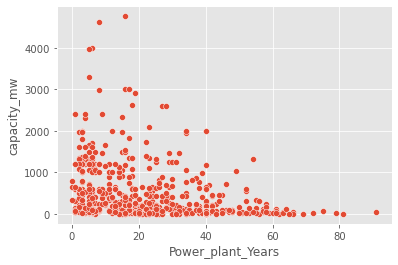

In [140]:
#lets see how plant age affects our model(capacity_mw)
plt.style.use('ggplot')
sns.scatterplot(x = "Power_plant_Years", y = "capacity_mw", data = df)
plt.show()

#### from the above plot we can say that older powerplants has lower capacity_mw compared to plants which have started recently.

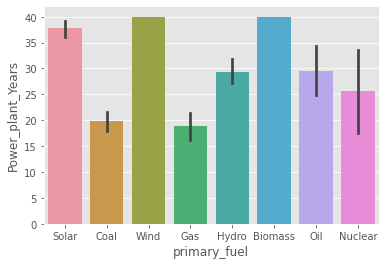

In [141]:
#lets have a look on relation between fuel used and powerplant age
sns.barplot(x = "primary_fuel", y = "Power_plant_Years", data = df)
plt.show()

#### from the above plot we can say that older plants use solar, wind and biomass

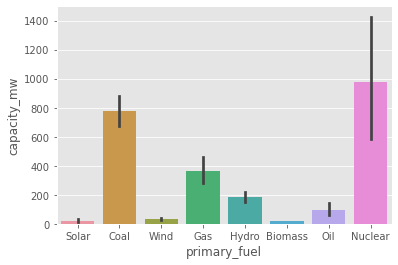

In [142]:
#Lets plot the bar plot for primary_fuel based on capaciy_mw
sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.show()

#### This tells that capacity_mw is high in case of Nuclear power plants, and coal power plants has capacity_mw next to it.

<AxesSubplot:>

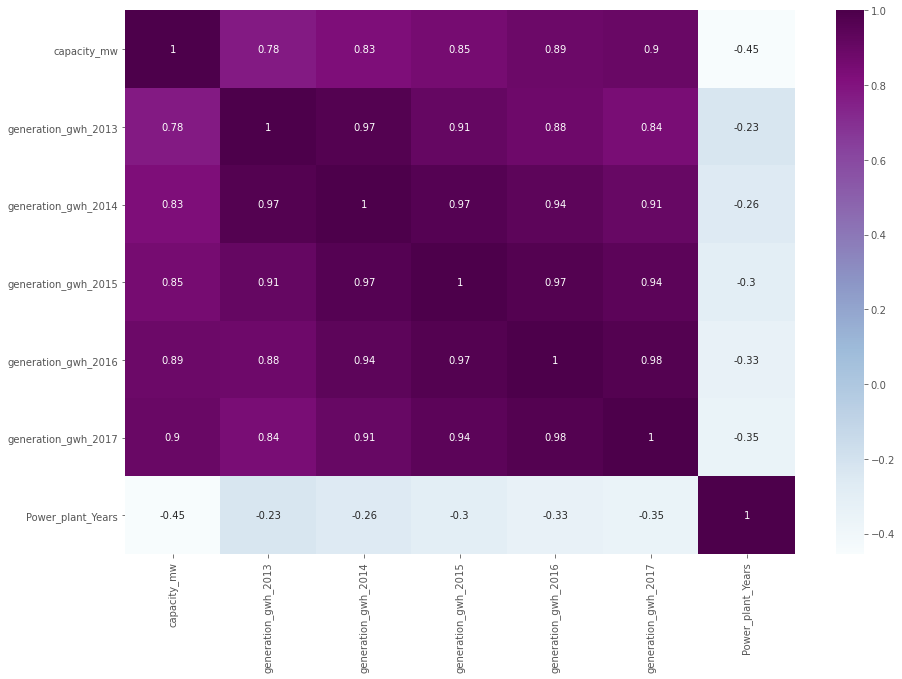

In [143]:
#correlation with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

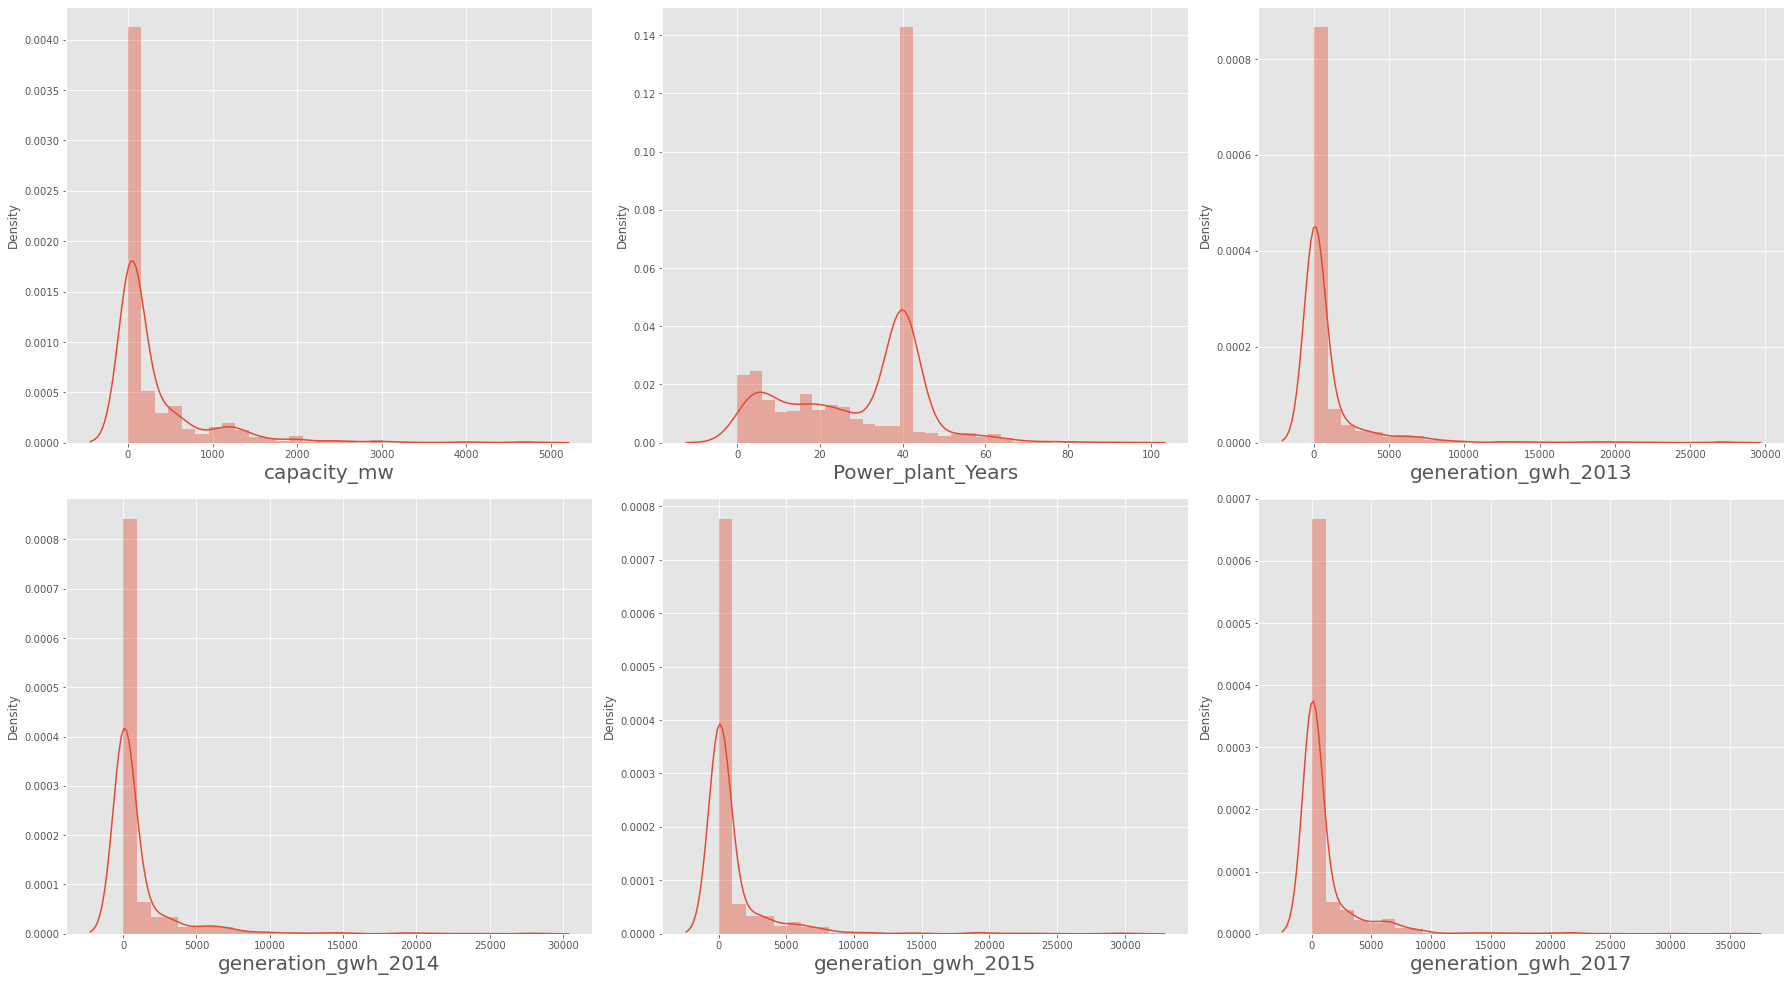

In [144]:
#Lets have a look on distribution of continuous parameters
plt.figure(figsize = (25,20))
plotnumber = 1
col = ["capacity_mw","Power_plant_Years","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2017"]
for column in col:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [145]:
# lets remove outliers from our data
# Applying zscore method for removing outliers from skewed features
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["Power_plant_Years","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2017"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [146]:
#remove index column as there is no use of it
df.drop(columns = "index", inplace = True)

In [147]:
#lets convert categorical data into numeric values for fitting and predicting
leb_enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = leb_enc.fit_transform(df[i])

In [148]:
# first we need to saperate our data intp label and features
x = df.drop(columns = ["capacity_mw"])
y = df["capacity_mw"]

In [149]:
# we still have skewness in our data, lets treat it using log transformation 
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [150]:
#seperating numerical data for applying standard scalar and bring all features to common scale
num_data = x.drop(columns = ["primary_fuel","source","geolocation_source"])
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns = num_data.columns)

In [153]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = 1)

## linear regression model

In [157]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

In [159]:
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 180.98479186569728
RMSE : 288.4755785307391


In [160]:
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_lr)*100}%")

Training r2 Score : 54.666924717802615 %
Testing r2 Score: 54.51211717966436%


In [ ]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_dt)*100}%")

In [161]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)


# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_rf)*100}%")

MAE : 101.22961771993236
RMSE : 199.63279698740905
Training r2 Score : 96.56103324919283 %
Testing r2 Score: 78.21581077796063%


In [162]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_knr)*100}%")

MAE : 109.79768108108108
RMSE : 221.5274560650019
Training r2 Score : 77.68497318975412 %
Testing r2 Score: 73.1754319027511%


In [163]:
#Lets use SVM regressor
from sklearn.svm import SVR
svr =  KNeighborsRegressor()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_train)
pred_svr = svr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_svr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_svr)*100}%")

MAE : 109.79768108108108
RMSE : 221.5274560650019
Training r2 Score : 77.68497318975412 %
Testing r2 Score: 73.1754319027511%


In [164]:
#lets check with XGBRegressor model
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_train)
pred_xgb = xgb.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgb)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_xgb)*100}%")

MAE : 121.20128306533194
RMSE : 260.7080329415146
Training r2 Score : 99.68400527964492 %
Testing r2 Score: 62.84763683416359%


In [168]:
joblib.dump(pred_rf,"plant_FuelType_prediction.pkl")

['plant_FuelType_prediction.pkl']